In [187]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [188]:
def nan(shape):
    a = np.empty(shape)
    a[:] = np.nan
    return a

In [189]:
def print_matrix(x, n, m, w=10):
    h = w * m /n
    plt.figure(figsize=(w, h))
    plt.title('Решения задачи теплопроводности')
    plt.imshow(x, aspect='auto', extent=[0, X_MAX, T_MAX, 0], interpolation='bicubic')
    plt.set_cmap('hot')
    plt.xlabel('X')
    plt.ylabel('Время')

    plt.colorbar()
    plt.show()

In [190]:
T_MAX = 0.5
X_MAX = 1

In [191]:
def get_mark(u):
    x = int(u.shape[1] / 2)
    return u[-1, x]

In [192]:
def create_matrix(nx, nt):
    t_step = T_MAX/(nt - 1)
    x_step = X_MAX/(nx - 1)
    matrix = nan((nt,nx,))
    matrix[0, :] = 0
    matrix[:, 0] = 0
    matrix[:, -1] = 0
    return matrix,x_step,t_step

In [193]:
def solve(X_samples,T_samples):
    u,x_step,t_step = create_matrix(X_samples, T_samples)
    f = lambda x, t: t * t_step * np.sinh(x * x_step)
    for t in range(T_samples - 1):
        A = np.eye(X_samples - 2, k=-1) * t_step / x_step ** 2
        B = np.eye(X_samples - 2) * -(1 + 2 * t_step / x_step ** 2)
        C = np.eye(X_samples - 2, k=1) * t_step / x_step ** 2

        F = nan(X_samples - 2)
        for x in range( X_samples - 2):
            F[x] = -u[t, x + 1] - t_step * f(x + 1, t + 1)
        solution = np.linalg.solve(A + B + C, F)
        u[t + 1, 1:-1] =  solution
#     print(np.isnan(u).sum())
    return u

0.02647421254190177


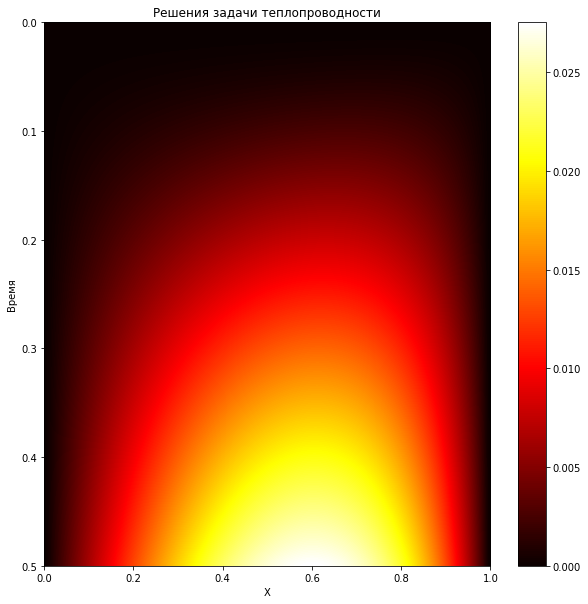

In [198]:
X_samples = 100
T_samples = 100
u = solve(X_samples, T_samples)
print(get_mark(u))
print_matrix(u, X_samples, T_samples)

In [ ]:
res = []
for T in range(10, 200, 2):
    l = []
    print(T, end=' ')
    for X in range(10, 200, 2):
        u = solve(X, T)
        l.append(get_mark(u))
    res.append(l)
res = np.array(res)

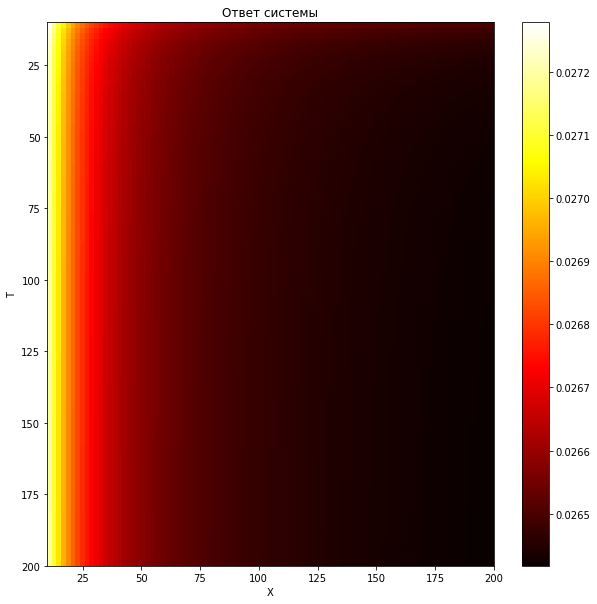

In [199]:
plt.figure(figsize=(10,10))
plt.title('Ответ системы')
plt.imshow(res, aspect='auto', extent=[10, 200, 200, 10])
plt.set_cmap('hot')
plt.xlabel('X')
plt.ylabel('T')

plt.colorbar()
plt.show()

In [196]:
res.max() - res.min() , (res.max() - res.min())/res.max()

(0.0008622034001387856, 0.031606406613188566)

Наибольшее значение имеет шаг сетки по оси длины стержня, шаг сетки по оси времени практически не вносит изменений в систему.

Разброс между максимальным и минимальным значением всего 0.0008622034001387856, что составляет около 3% для данных.

Особой разницы в ответе между точным расчетом и приблизительным нет, поэтому можно использовать малое разбиение для ускорения вычислений.